In [2]:
# install kaggle
!pip install -q kaggle

In [3]:
# upload the generated api token in .json format from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"urvikashyap","key":"ff1249274c273a5f60653b72fad85497"}'}

In [4]:
# make a kaggle directory in my files
!mkdir ~/.kaggle

In [5]:
# put the kaggle.json file in that directory
!cp kaggle.json ~/.kaggle/

In [6]:
# grant permission for the .json file to act
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# list available datsets to ensure that the API worked and kaggle's linked
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          17187        374  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          12891        274  1.0              
priyamchoksi/spotify-dataset-114k-songs                             114000 Spotify Songs                                  8MB  2024-07-07 17:12:18            757         29  1.0              
ihelon/coffee-sales                     

In [8]:
# download the mri segmentation datset with its api command
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

Dataset URL: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation
License(s): CC-BY-NC-SA-4.0
100% 712M/714M [00:40<00:00, 21.6MB/s]
100% 714M/714M [00:40<00:00, 18.5MB/s]


In [9]:
# unzip the images from the .zip file so we can directly access these images
!unzip lgg-mri-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

Data Preprocessing

In [10]:
#visualize the amount of tumours and non-tumours
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import pandas as pd

# path of all the images:
root_path = '/content/lgg-mri-segmentation/kaggle_3m/'

potential_mask_files = glob.glob(root_path + "*/*_mask*") # names of all the files with masks

mask_files = []
add_count = 0
for mask in potential_mask_files: # took most the files that have tumours in them to decrease the dataset since RAM keeps running out
  if np.max(cv2.imread(mask)) > 0:
    mask_files.append(mask)
  elif np.max(cv2.imread(mask)) == 0 and add_count % 3 == 0:
    mask_files.append(mask)

  add_count += 1

image_files = []
for mask in mask_files:
  rmask = mask.replace("_mask", "")
  image_files.append(rmask)

print(mask_files) # - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23_mask.tif
print(image_files) # - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23.tif

tumour_count = []

def diagnosis(mask_path):
    if np.max(cv2.imread(mask_path)) > 0: # return np.max(cv2.imread(mask_path)) - returns 255 if there is a tumour, otherwise returns 0
      tumour_count.append("1")
      return 1
    else:
      tumour_count.append("0")
      return 0

files_df = pd.DataFrame({"image_path": image_files,
                         "mask_path": mask_files,
                         "diagnosis": [diagnosis(x) for x in mask_files]})

print(files_df)

['/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_25_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_30_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_2_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_28_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_32_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_38_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_22_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_34_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_31_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_27_mask.tif', '/content/

Tumours: 1373 ........... Non-Tumours: 867


<BarContainer object of 2 artists>

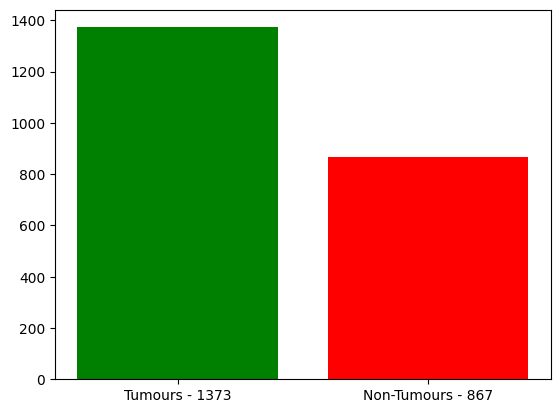

In [11]:
# to visualize the amount of tumours and non-tumours in the dataset
n_tumours = tumour_count.count("1")
n_nontumours = tumour_count.count("0")

print("Tumours: " + str(n_tumours), "...........", "Non-Tumours: " + str(n_nontumours))

plt.bar(["Tumours - " + str(n_tumours), "Non-Tumours - " + str(n_nontumours)], [n_tumours, n_nontumours], color=["green", "red"])

In [12]:
# importing libraries
import torch
import torchvision
from torchvision.transforms import transforms

In [13]:
# finding mean and standard deviation for the dataset
num_pixels = len(image_files)*256*256 #total number of pixels in our dataset

total_sum = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  total_sum += image[0].sum() #sum of the current batch of images

mean = total_sum/num_pixels


# std calculated with formula
sum_squared_error = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  sum_squared_error += ((image[0] - mean)**2).sum() #adding up the difference between all the elements in the batch and the mean

std = torch.sqrt(sum_squared_error/num_pixels) # only one element tensors can be converted to Python scalars, so use torch.sqrt instead of math.sqrt

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor(0.0221)
Standard Deviation: tensor(1.1776)


In [14]:
image_data = []
mask_data = []

# files are file paths, dataset is empty list that you will append the images too
def loading_data(files, dataset, actions):
  for data in files:
    # reading the image/mask
    image = cv2.imread(data) #makes it a numpy array

    # resizing the image/mask
    image = cv2.resize(image, (96, 96))
    # before, I flattened it and it changed a lot because, after the transformations, the tensor changes its composition when rotating or flipping
    # so when setting it to 256x256 again after, there's a weird result

    # convert the PIL image into a PyTorch tensor, cast the int8 values to float32, normalize
    if actions == True: # images
      transform = torchvision.transforms.Compose([transforms.ToTensor(),
                                                  transforms.ConvertImageDtype(torch.float),
                                                  transforms.Normalize((mean, mean, mean), (std, std, std))])
      image = transform(image)

    elif actions == False: # masks
      transform = torchvision.transforms.Compose([transforms.ToTensor(), transforms.ConvertImageDtype(torch.float), transforms.Grayscale()])
      image = transform(image)

    # no blurs needed because the edges need to be clear and precise

    dataset.append(image)

In [15]:
loading_data(image_files, image_data, True)

In [16]:
loading_data(mask_files, mask_data, False)

In [17]:
# when you run it again and again, change in #s for training data because it adds on

print(len(image_data), len(mask_data))

# split dataset into training, validation, and testing
len_trdataset = int(np.floor(len(image_data) * 0.60))
len_vtdataset = (len(image_data)-len_trdataset)//2

trimage_data = image_data[:len_trdataset]
trmask_data = mask_data[:len_trdataset]

vimage_data = image_data[len_trdataset:(len_trdataset+len_vtdataset)]
vmask_data = mask_data[len_trdataset:(len_trdataset+len_vtdataset)]

testimage_data = image_data[(len_trdataset+len_vtdataset):]
testmask_data = mask_data[(len_trdataset+len_vtdataset):]

print(str(len(trimage_data)), "----", str(len(vimage_data)), "----", str(len(testimage_data)))

2240 2240
1344 ---- 448 ---- 448


In [18]:
# the normalize function usually goes after data augmentation, but since only the positions of the pixels are changing (when flipping/rotating), it's not a problem

def data_augmentation(dataset): # adding modifications of original images to the dataset
  count = 0
  for image in dataset:
    # since the image is in a tensor, you can use torchvision's transforms
    # list of data augmentation commands
    if count % 9 == 0:
      # 90 degree clockwise rotation
      transform0 = transforms.RandomRotation(degrees=[90,90])
      image = transform0(image)
      dataset.append(image)

    elif count % 9 == 1:
      # vertical flip
      transform1 = transforms.RandomVerticalFlip(p=1)
      image = transform1(image)
      dataset.append(image)

    elif count % 9 == 2:
      # horizontal flip
      transform2 = transforms.RandomHorizontalFlip(p=1)
      image = transform2(image)
      dataset.append(image)

    count += 1

In [19]:
print(len(trimage_data))
print(len(trmask_data))

# data augmentation
data_augmentation(trimage_data)
data_augmentation(trmask_data)

# print statements to ensure that data augmentation worked
print(len(trimage_data))
print(len(trmask_data))

1344
1344
2016
2016


In [20]:
from torchvision import utils

# instead of making a classs to retrieve the data, you can zip the images and the masks, make that a tuple, and use that data for the dataloader
training_data = list(zip(trimage_data, trmask_data))
validation_data = list(zip(vimage_data, vmask_data))
testing_data = list(zip(testimage_data, testmask_data))

trainloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=64, shuffle=True)
testingloader = torch.utils.data.DataLoader(testing_data, batch_size=64, shuffle=True)

TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


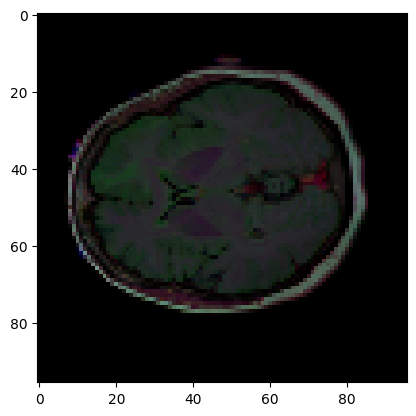

Masks:


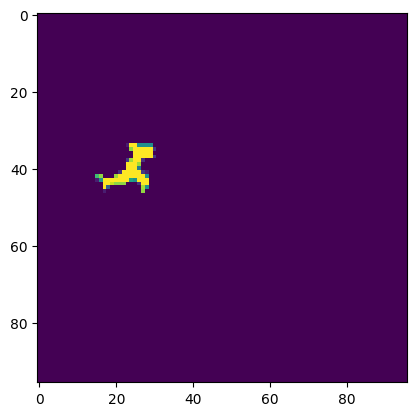



TRAIN:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


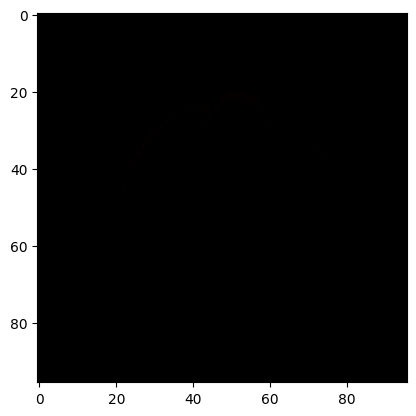

Masks:


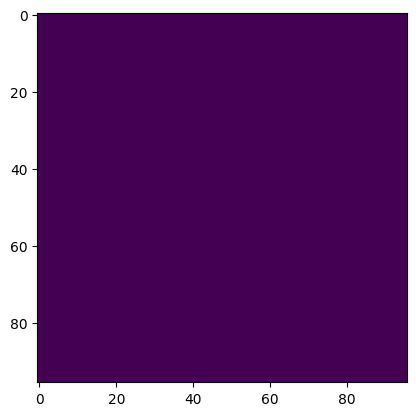



TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


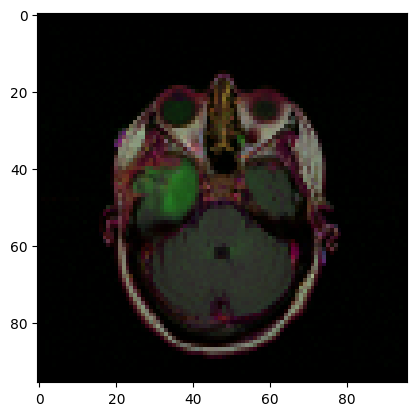

Masks:


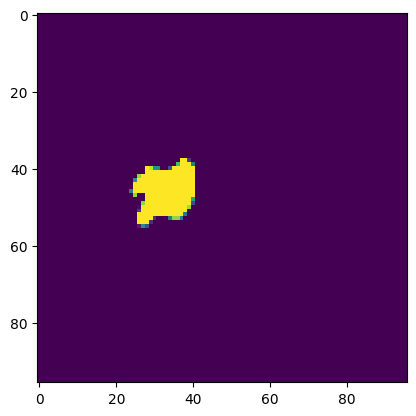

In [21]:
# testing data
trimages, trmasks = next(iter(trainloader))

trimages = trimages.permute((0,2,3,1))
trmasks = trmasks.permute((0,2,3,1))
trmasks = trmasks.squeeze()

print("TEST:")
print(trimages.shape)
print(trmasks.shape) # greyscaled

print("Images:")
plt.imshow(trimages[3])
plt.show()
print("Masks:")
plt.imshow(trmasks[3])
plt.show()

print("\n")

# validation data
vimages, vmasks = next(iter(validationloader))

vimages = vimages.permute((0,2,3,1))
vmasks = vmasks.permute((0,2,3,1))
vmasks = vmasks.squeeze()

print("TRAIN:")
print(vimages.shape)
print(vmasks.shape) # greyscaled

print("Images:")
plt.imshow(vimages[1])
plt.show()
print("Masks:")
plt.imshow(vmasks[1])
plt.show()

print("\n")

# testing data
testimages, testmasks = next(iter(testingloader))

testimages = testimages.permute((0,2,3,1))
testmasks = testmasks.permute((0,2,3,1))
testmasks = testmasks.squeeze()

print("TEST:")
print(testimages.shape)
print(testmasks.shape) # greyscaled

print("Images:")
plt.imshow(testimages[0])
plt.show()
print("Masks:")
plt.imshow(testmasks[0])
plt.show()

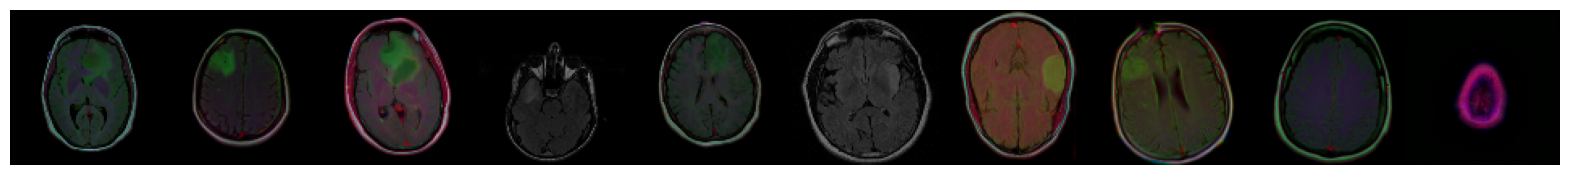

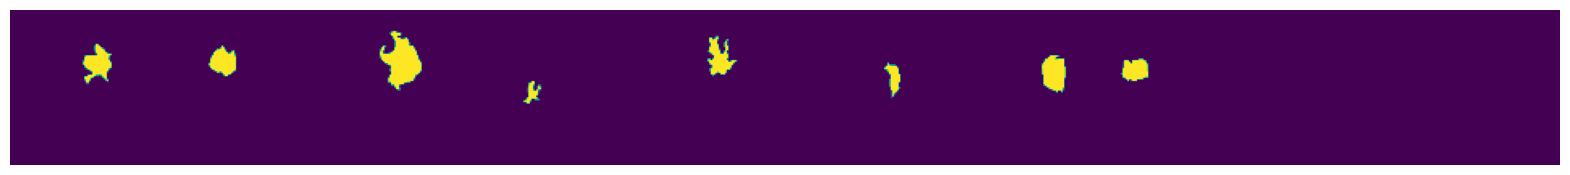

In [22]:
# visualize the images
def show_aug(loader, nrows=4, ncols=10):

    images, masks = next(iter(loader))
    images = images.permute((0,2,3,1))
    masks = masks.permute((0,2,3,1))
    masks = masks.squeeze()

    plt.figure(figsize=(20, 20))
    for i in range(len(images[:10])):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(images[i])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    plt.figure(figsize=(20, 20))
    for j in range(len(masks[:10])):
      plt.subplot(nrows, ncols, j+1)
      plt.imshow(masks[j])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

show_aug(trainloader)

##BrainTumorNet: A lightweight Segmentation Model


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BrainTumorNet(nn.Module):
    def __init__(self):
        super(BrainTumorNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 1, kernel_size=1)  # Final output layer with single channel

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.upsample = nn.Upsample(scale_factor=4, mode='bilinear', align_corners=True)

        self.attention = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))

        attn = self.attention(x)
        x = x * attn

        x = self.conv4(x)
        x = self.upsample(x)  # Upsample to match the input size
        x = torch.sigmoid(x)
        return x

model = BrainTumorNet()
print(model)


BrainTumorNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 1, kernel_size=(1, 1), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(scale_factor=4.0, mode='bilinear')
  (attention): Sequential(
    (0): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
    (3): Sigmoid()
  )
)


In [24]:
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()
        self.bce = nn.BCELoss()

    def forward(self, y_pred, y_true):
        bce_loss = self.bce(y_pred, y_true)
        dice_loss = 1 - dice_coefficient(y_true, y_pred)
        return bce_loss + dice_loss

criterion = CustomLoss()


In [25]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(trainloader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


Epoch 1/25, Loss: 1.2637
Epoch 2/25, Loss: 0.8617
Epoch 3/25, Loss: 0.7862
Epoch 4/25, Loss: 0.6359
Epoch 5/25, Loss: 0.5098
Epoch 6/25, Loss: 0.4822
Epoch 7/25, Loss: 0.4645
Epoch 8/25, Loss: 0.4335
Epoch 9/25, Loss: 0.4173
Epoch 10/25, Loss: 0.4046
Epoch 11/25, Loss: 0.3854
Epoch 12/25, Loss: 0.3792
Epoch 13/25, Loss: 0.3877
Epoch 14/25, Loss: 0.3710
Epoch 15/25, Loss: 0.3638
Epoch 16/25, Loss: 0.3529
Epoch 17/25, Loss: 0.3575
Epoch 18/25, Loss: 0.3467
Epoch 19/25, Loss: 0.3547
Epoch 20/25, Loss: 0.3413
Epoch 21/25, Loss: 0.3319
Epoch 22/25, Loss: 0.3325
Epoch 23/25, Loss: 0.3255
Epoch 24/25, Loss: 0.3313
Epoch 25/25, Loss: 0.3230


In [26]:
model.eval()
val_loss = 0.0
with torch.no_grad():
    for inputs, labels in validationloader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item() * inputs.size(0)

val_loss /= len(validationloader.dataset)
print(f'Validation Loss: {val_loss:.4f}')


Validation Loss: 0.4890


In [27]:
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

def calculate_metrics(loader, model):
    model.eval()
    dice_scores = []
    iou_scores = []

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = outputs > 0.5
            preds = preds.float()
            labels = labels.float()

            dice = dice_coefficient(labels, preds)
            intersection = (preds * labels).sum()
            union = preds.sum() + labels.sum() - intersection
            iou = intersection / union

            dice_scores.append(dice.item())
            iou_scores.append(iou.item())

    avg_dice = np.mean(dice_scores)
    avg_iou = np.mean(iou_scores)

    print(f'Average Dice Coefficient: {avg_dice:.4f}')
    print(f'Average IoU: {avg_iou:.4f}')

calculate_metrics(validationloader, model)


Average Dice Coefficient: 0.5691
Average IoU: 0.4064


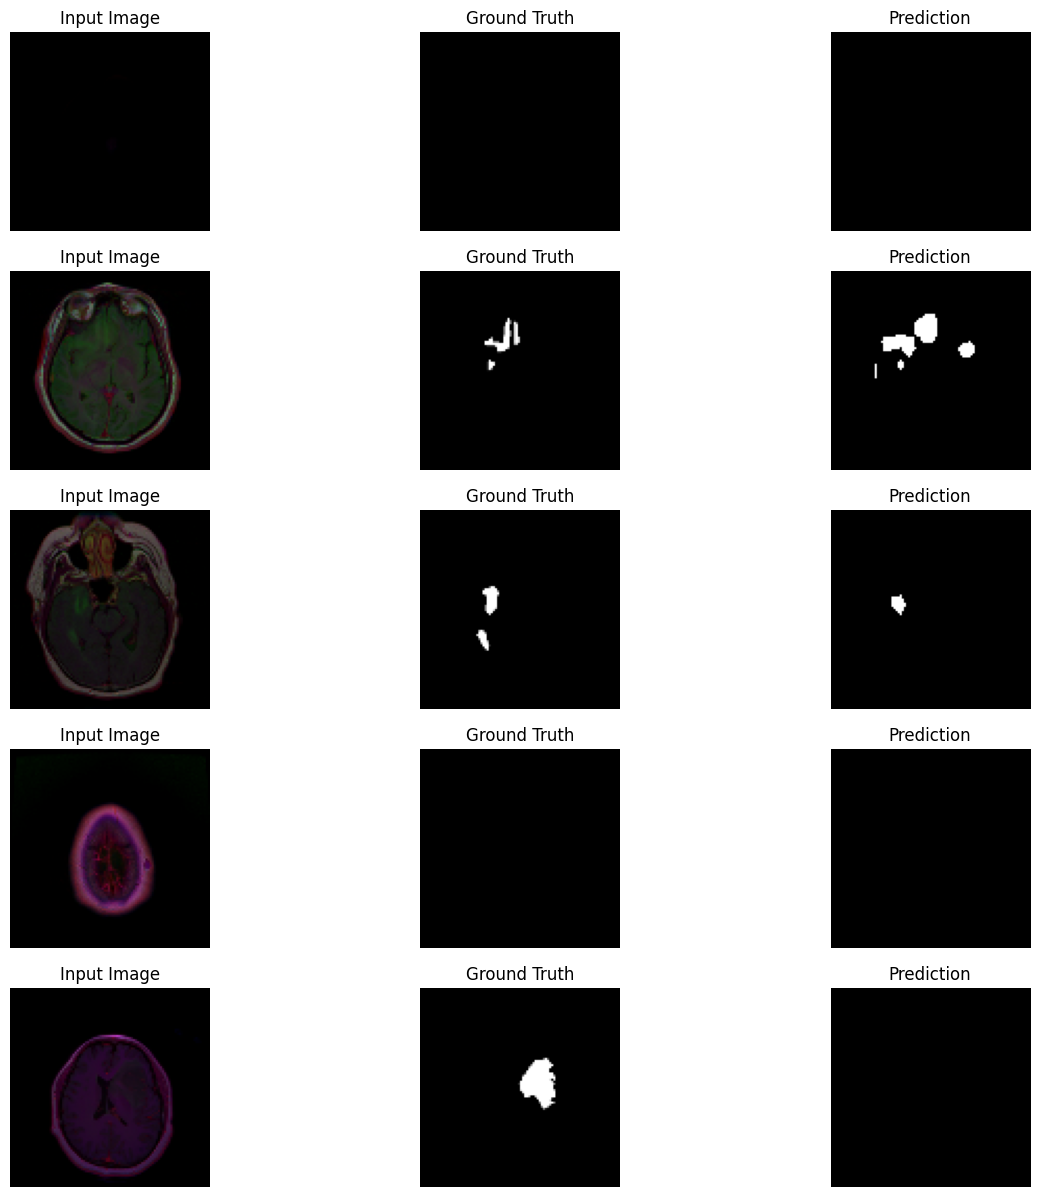

In [28]:
def visualize_predictions(loader, model, num_images=5):
    model.eval()
    images, masks = next(iter(loader))
    outputs = model(images)
    preds = outputs > 0.5

    plt.figure(figsize=(15, num_images * 3))
    for i in range(num_images):
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[i].permute(1, 2, 0).cpu())
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(masks[i].squeeze().cpu(), cmap='gray')
        plt.title('Ground Truth')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(preds[i].squeeze().cpu(), cmap='gray')
        plt.title('Prediction')
        plt.axis('off')

    plt.show()

visualize_predictions(validationloader, model)


In [29]:
def calculate_accuracy(loader, model):
    model.eval()
    total_correct = 0
    total_pixels = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = outputs > 0.5
            preds = preds.float()
            labels = labels.float()

            total_correct += (preds == labels).sum().item()
            total_pixels += torch.numel(preds)

    accuracy = total_correct / total_pixels
    print(f'Accuracy: {accuracy:.4f}')
    return accuracy

calculate_accuracy(validationloader, model)


Accuracy: 0.9780


0.977967035202753

Epoch 1/25, Loss: 0.3324
Validation Loss: 0.5173
Saved Best Model with Validation Loss: 0.5173
Epoch 2/25, Loss: 0.3349
Validation Loss: 0.5005
Saved Best Model with Validation Loss: 0.5005
Epoch 3/25, Loss: 0.3229
Validation Loss: 0.5197
Epoch 4/25, Loss: 0.3228
Validation Loss: 0.4964
Saved Best Model with Validation Loss: 0.4964
Epoch 5/25, Loss: 0.3172
Validation Loss: 0.4800
Saved Best Model with Validation Loss: 0.4800
Epoch 6/25, Loss: 0.3143
Validation Loss: 0.4926
Epoch 7/25, Loss: 0.3146
Validation Loss: 0.4823
Epoch 8/25, Loss: 0.3158
Validation Loss: 0.4964
Epoch 9/25, Loss: 0.3233
Validation Loss: 0.4942
Epoch 10/25, Loss: 0.3140
Validation Loss: 0.4758
Saved Best Model with Validation Loss: 0.4758
Epoch 11/25, Loss: 0.3069
Validation Loss: 0.4684
Saved Best Model with Validation Loss: 0.4684
Epoch 12/25, Loss: 0.3057
Validation Loss: 0.4757
Epoch 13/25, Loss: 0.3093
Validation Loss: 0.4880
Epoch 14/25, Loss: 0.3067
Validation Loss: 0.4802
Epoch 15/25, Loss: 0.2996
Validat

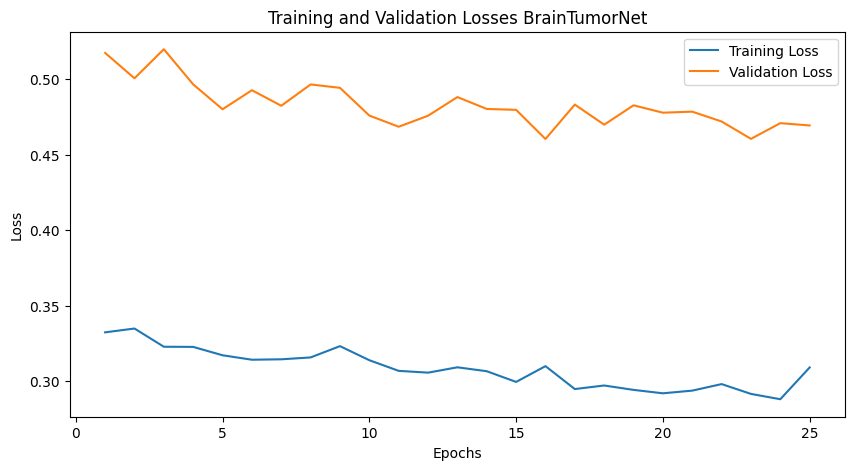

In [30]:
import matplotlib.pyplot as plt

# Define lists to store the loss values
train_losses = []
val_losses = []

# Best validation loss
best_val_loss = float('inf')

# Number of epochs
num_epochs = 25
early_stop = False

# Training loop
for epoch in range(num_epochs):


    if early_stop:
        print("Early stopping")
        break
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(trainloader.dataset)
    train_losses.append(epoch_loss)  # Store training loss
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in validationloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(validationloader.dataset)
    val_losses.append(val_loss)  # Store validation loss
    print(f'Validation Loss: {val_loss:.4f}')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'Saved Best Model with Validation Loss: {best_val_loss:.4f}')

# Plot the training and validation losses
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Losses BrainTumorNet')
    plt.show()

plot_losses(train_losses, val_losses)


In [31]:
# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Calculate accuracy
train_accuracy = calculate_accuracy(trainloader, model)
val_accuracy = calculate_accuracy(validationloader, model)
test_accuracy = calculate_accuracy(testingloader, model)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Accuracy: 0.9771
Accuracy: 0.9776
Accuracy: 0.9774
Training Accuracy: 0.9771
Validation Accuracy: 0.9776
Test Accuracy: 0.9774


#Using Metaheuristic Optimisation Algorithms - Whale, Bee, Firefly and compare the three to find best hyperparameters to use in our final model to further train and evaluate it

Whale

In [24]:
#Whale
def initialize_whales(num_whales, dim, bounds):
    return np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_whales, dim))

def fitness(whale):
    return objective_function(whale)

def update_whales(whales, best_whale, bounds, num_iterations):
    a = 2  # Decreasing coefficient
    a_decrement = 2 / num_iterations

    for t in range(num_iterations):
        for i in range(len(whales)):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A = 2 * a * r1 - a
            C = 2 * r2
            b = 1  # Spiral constant
            l = np.random.uniform(-1, 1)  # Random number in [-1, 1]
            p = np.random.rand()

            if p < 0.5:
                if abs(A) < 1:
                    D = abs(C * best_whale - whales[i])
                    whales[i] = best_whale - A * D
                else:
                    random_whale = whales[np.random.randint(0, len(whales))]
                    D = abs(C * random_whale - whales[i])
                    whales[i] = random_whale - A * D
            else:
                D = abs(best_whale - whales[i])
                whales[i] = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_whale

        a -= a_decrement

    return whales

def run_woa(bounds, num_whales=20, num_iterations=30, dim=2):
    whales = initialize_whales(num_whales, dim, bounds)
    best_whale = whales[0]
    best_fitness = fitness(best_whale)

    for whale in whales:
        fit = fitness(whale)
        if fit < best_fitness:
            best_fitness = fit
            best_whale = whale

    whales = update_whales(whales, best_whale, bounds, num_iterations)

    return best_whale, best_fitness


Bee

In [25]:
#Bee
def initialize_bees(num_bees, dim, bounds):
    return np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_bees, dim))

def update_bees(bees, best_bee, bounds, num_iterations):
    for t in range(num_iterations):
        for i in range(len(bees)):
            if np.random.rand() < 0.5:
                bees[i] = best_bee + np.random.uniform(-1, 1, size=(dim,)) * (bounds[:, 1] - bounds[:, 0])
            else:
                bees[i] = initialize_bees(1, dim, bounds)[0]
        for bee in bees:
            fit = fitness(bee)
            if fit < fitness(best_bee):
                best_bee = bee
    return best_bee

def run_bee(bounds, num_bees=20, num_iterations=30, dim=2):
    bees = initialize_bees(num_bees, dim, bounds)
    best_bee = bees[0]
    best_fitness = fitness(best_bee)

    for bee in bees:
        fit = fitness(bee)
        if fit < best_fitness:
            best_fitness = fit
            best_bee = bee

    best_bee = update_bees(bees, best_bee, bounds, num_iterations)

    return best_bee, best_fitness


FireFly

In [26]:
#Firefly
def initialize_fireflies(num_fireflies, dim, bounds):
    return np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_fireflies, dim))

def attractiveness(beta0, gamma, r):
    return beta0 * np.exp(-gamma * r**2)

def update_fireflies(fireflies, best_firefly, bounds, num_iterations):
    beta0 = 1.0
    gamma = 1.0
    alpha = 0.2

    for t in range(num_iterations):
        for i in range(len(fireflies)):
            for j in range(len(fireflies)):
                if fitness(fireflies[j]) < fitness(fireflies[i]):
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = attractiveness(beta0, gamma, r)
                    fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(dim) - 0.5)
                    fireflies[i] = np.clip(fireflies[i], bounds[:, 0], bounds[:, 1])
        for firefly in fireflies:
            fit = fitness(firefly)
            if fit < fitness(best_firefly):
                best_firefly = firefly
    return best_firefly

def run_firefly(bounds, num_fireflies=20, num_iterations=30, dim=2):
    fireflies = initialize_fireflies(num_fireflies, dim, bounds)
    best_firefly = fireflies[0]
    best_fitness = fitness(best_firefly)

    for firefly in fireflies:
        fit = fitness(firefly)
        if fit < best_fitness:
            best_fitness = fit
            best_firefly = firefly

    best_firefly = update_fireflies(fireflies, best_firefly, bounds, num_iterations)

    return best_firefly, best_fitness



Comparison and best algo module

In [27]:
import numpy as np
import multiprocessing

# Define the bounds for hyperparameters
bounds = np.array([[0.0001, 0.1],  # Learning rate
                   [0.2, 0.5]])    # Dropout rate

# Placeholder for the objective function
def objective_function(hyperparams):
    learning_rate, dropout_rate = hyperparams
    # Implement the training and validation logic here
    # For demonstration, let's assume it returns a random validation loss
    validation_loss = np.random.random()  # Replace with actual validation loss calculation
    return validation_loss

# Initialize the population (whales, fireflies, bees, etc.)
def initialize_population(num_individuals, dim, bounds):
    return np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_individuals, dim))

# Whale Optimization Algorithm (WOA) update function
def update_whales(whales, best_whale, bounds, num_iterations):
    a = 2
    a_decrement = 2 / num_iterations
    for t in range(num_iterations):
        for i in range(len(whales)):
            r1, r2 = np.random.rand(), np.random.rand()
            A, C = 2 * a * r1 - a, 2 * r2
            b, l = 1, np.random.uniform(-1, 1)
            p = np.random.rand()
            if p < 0.5:
                if abs(A) < 1:
                    D = abs(C * best_whale - whales[i])
                    whales[i] = best_whale - A * D
                else:
                    random_whale = whales[np.random.randint(0, len(whales))]
                    D = abs(C * random_whale - whales[i])
                    whales[i] = random_whale - A * D
            else:
                D = abs(best_whale - whales[i])
                whales[i] = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_whale
        a -= a_decrement
    return whales

# Bee Algorithm update function
def update_bees(bees, best_bee, bounds, num_iterations):
    for t in range(num_iterations):
        for i in range(len(bees)):
            if np.random.rand() < 0.5:
                bees[i] = best_bee + np.random.uniform(-1, 1, size=(bounds.shape[1],)) * (bounds[:, 1] - bounds[:, 0])
            else:
                bees[i] = initialize_population(1, bounds.shape[1], bounds)[0]
        for bee in bees:
            if objective_function(bee) < objective_function(best_bee):
                best_bee = bee
    return best_bee

# Firefly Algorithm update function
def attractiveness(beta0, gamma, r):
    return beta0 * np.exp(-gamma * r**2)

def update_fireflies(fireflies, best_firefly, bounds, num_iterations):
    beta0, gamma, alpha = 1.0, 1.0, 0.2
    for t in range(num_iterations):
        for i in range(len(fireflies)):
            for j in range(len(fireflies)):
                if objective_function(fireflies[j]) < objective_function(fireflies[i]):
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = attractiveness(beta0, gamma, r)
                    fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(bounds.shape[1]) - 0.5)
                    fireflies[i] = np.clip(fireflies[i], bounds[:, 0], bounds[:, 1])
        for firefly in fireflies:
            if objective_function(firefly) < objective_function(best_firefly):
                best_firefly = firefly
    return best_firefly

# Parallelize fitness evaluations
def parallel_fitness(individual):
    return objective_function(individual)

def run_parallel_optimization(algorithm, bounds, num_individuals=5, num_iterations=5, dim=2):
    population = initialize_population(num_individuals, dim, bounds)
    best_individual = population[0]
    best_fitness = parallel_fitness(best_individual)

    pool = multiprocessing.Pool()
    for _ in range(num_iterations):
        fitness_values = pool.map(parallel_fitness, population)
        for i, fit in enumerate(fitness_values):
            if fit is not None and (best_fitness is None or fit < best_fitness):
                best_fitness = fit
                best_individual = population[i]

        if algorithm == 'WOA':
            population = update_whales(population, best_individual, bounds, num_iterations)
        elif algorithm == 'Bee':
            best_individual = update_bees(population, best_individual, bounds, num_iterations)
        elif algorithm == 'Firefly':
            best_individual = update_fireflies(population, best_individual, bounds, num_iterations)

    pool.close()
    pool.join()

    return best_individual, best_fitness

# Compare algorithms
algorithms = ['WOA', 'Bee', 'Firefly']
results = {}

for name in algorithms:
    best_hyperparams, best_fitness = run_parallel_optimization(name, bounds, num_individuals=5, num_iterations=5, dim=2)
    results[name] = (best_hyperparams, best_fitness)
    print(f"Algorithm: {name}, Best Hyperparameters: {best_hyperparams}, Best Fitness: {best_fitness}")

# Find and print the best algorithm based on fitness


# Print the results for each algorithm
for name, result in results.items():
    best_hyperparams, best_fitness = result
    print(f"Algorithm: {name}, Best Hyperparameters: {best_hyperparams}, Best Fitness: {best_fitness}")
best_algorithm = min(results, key=lambda k: results[k][1])
best_hyperparams, best_fitness = results[best_algorithm]

print(f"\nBest Metaheuristic Optimization Algorithm: {best_algorithm}")
print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Best Fitness: {best_fitness}")

Algorithm: WOA, Best Hyperparameters: [-0.0366346  -0.18775406], Best Fitness: 0.15081190663039967
Algorithm: Bee, Best Hyperparameters: [ 0.11351875 -0.06827486], Best Fitness: 0.046367909260611184
Algorithm: Firefly, Best Hyperparameters: [0.04237887 0.39735089], Best Fitness: 0.14499260203322695
Algorithm: WOA, Best Hyperparameters: [-0.0366346  -0.18775406], Best Fitness: 0.15081190663039967
Algorithm: Bee, Best Hyperparameters: [ 0.11351875 -0.06827486], Best Fitness: 0.046367909260611184
Algorithm: Firefly, Best Hyperparameters: [0.04237887 0.39735089], Best Fitness: 0.14499260203322695

Best Metaheuristic Optimization Algorithm: Bee
Best Hyperparameters: [ 0.11351875 -0.06827486]
Best Fitness: 0.046367909260611184


#Based on the above results our best Metaheuristic Optimization Algorithm is : BEE optimisation Algorithm
## Final Training and Evaluation of BrainTumorNet using Bee Optimisation

Epoch 1/50, Loss: 1.0786
Validation Loss: 0.9296
Saved Best Model with Validation Loss: 0.9296
Epoch 2/50, Loss: 0.8793
Validation Loss: 0.8188
Saved Best Model with Validation Loss: 0.8188
Epoch 3/50, Loss: 0.6138
Validation Loss: 0.7208
Saved Best Model with Validation Loss: 0.7208
Epoch 4/50, Loss: 0.5107
Validation Loss: 0.6627
Saved Best Model with Validation Loss: 0.6627
Epoch 5/50, Loss: 0.4582
Validation Loss: 0.5240
Saved Best Model with Validation Loss: 0.5240
Epoch 6/50, Loss: 0.3959
Validation Loss: 0.5151
Saved Best Model with Validation Loss: 0.5151
Epoch 7/50, Loss: 0.3745
Validation Loss: 0.4914
Saved Best Model with Validation Loss: 0.4914
Epoch 8/50, Loss: 0.3509
Validation Loss: 0.4910
Saved Best Model with Validation Loss: 0.4910
Epoch 9/50, Loss: 0.3376
Validation Loss: 0.5046
Epoch 10/50, Loss: 0.3359
Validation Loss: 0.4718
Saved Best Model with Validation Loss: 0.4718
Epoch 11/50, Loss: 0.3208
Validation Loss: 0.4792
Epoch 12/50, Loss: 0.3201
Validation Loss: 0.

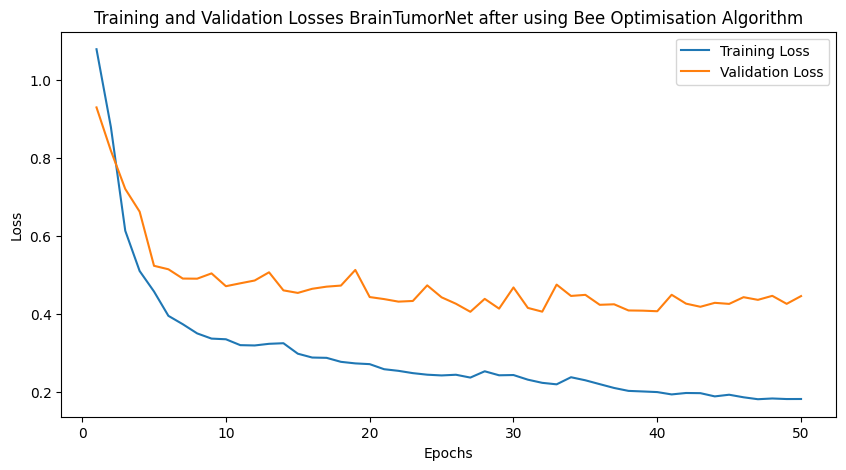

Accuracy: 0.9787
Accuracy: 0.9790
Accuracy: 0.9808
Training Accuracy: 0.9787
Validation Accuracy: 0.9790
Test Accuracy: 0.9808


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the enhanced BrainTumorNet model
class BrainTumorNet(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(BrainTumorNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(512, 1, kernel_size=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.upsample = nn.Upsample(scale_factor=8, mode='bilinear', align_corners=True)
        self.dropout = nn.Dropout(p=dropout_rate)

        self.attention = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = self.dropout(x)

        attn = self.attention(x)
        x = x * attn

        x = self.conv5(x)
        x = self.upsample(x)
        x = torch.sigmoid(x)
        return x

# Define the custom loss function
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()
        self.bce = nn.BCELoss()

    def forward(self, y_pred, y_true):
        bce_loss = self.bce(y_pred, y_true)
        dice_loss = 1 - dice_coefficient(y_true, y_pred)
        return bce_loss + dice_loss

criterion = CustomLoss()

# Use the best hyperparameters to train the final model
best_learning_rate = 0.001  # Adjusted learning rate
best_dropout_rate = 0.3     # Adjusted dropout rate

def train_final_model(best_learning_rate, best_dropout_rate, trainloader, validationloader, testingloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    final_model = BrainTumorNet(dropout_rate=best_dropout_rate).to(device)
    final_optimizer = optim.Adam(final_model.parameters(), lr=best_learning_rate)

    num_epochs = 50  # Increased number of epochs
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        final_model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            final_optimizer.zero_grad()
            outputs = final_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            final_optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(trainloader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

        final_model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in validationloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = final_model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(validationloader.dataset)
        val_losses.append(val_loss)
        print(f'Validation Loss: {val_loss:.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(final_model.state_dict(), 'final_model.pth')
            print(f'Saved Best Model with Validation Loss: {best_val_loss:.4f}')

    # Plot losses after training
    plot_losses(train_losses, val_losses)

    return final_model

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Losses BrainTumorNet after using Bee Optimisation Algorithm')
    plt.show()

# Evaluate the final model
def evaluate_model(model, loader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    total_correct = 0
    total_pixels = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs > 0.5
            preds = preds.float()
            labels = labels.float()

            total_correct += (preds == labels).sum().item()
            total_pixels += torch.numel(preds)

    accuracy = total_correct / total_pixels
    print(f'Accuracy: {accuracy:.4f}')
    return accuracy

# Train the final model
final_model = train_final_model(best_learning_rate, best_dropout_rate, trainloader, validationloader, testingloader)

# Evaluate the final model
train_accuracy = evaluate_model(final_model, trainloader)
val_accuracy = evaluate_model(final_model, validationloader)
test_accuracy = evaluate_model(final_model, testingloader)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


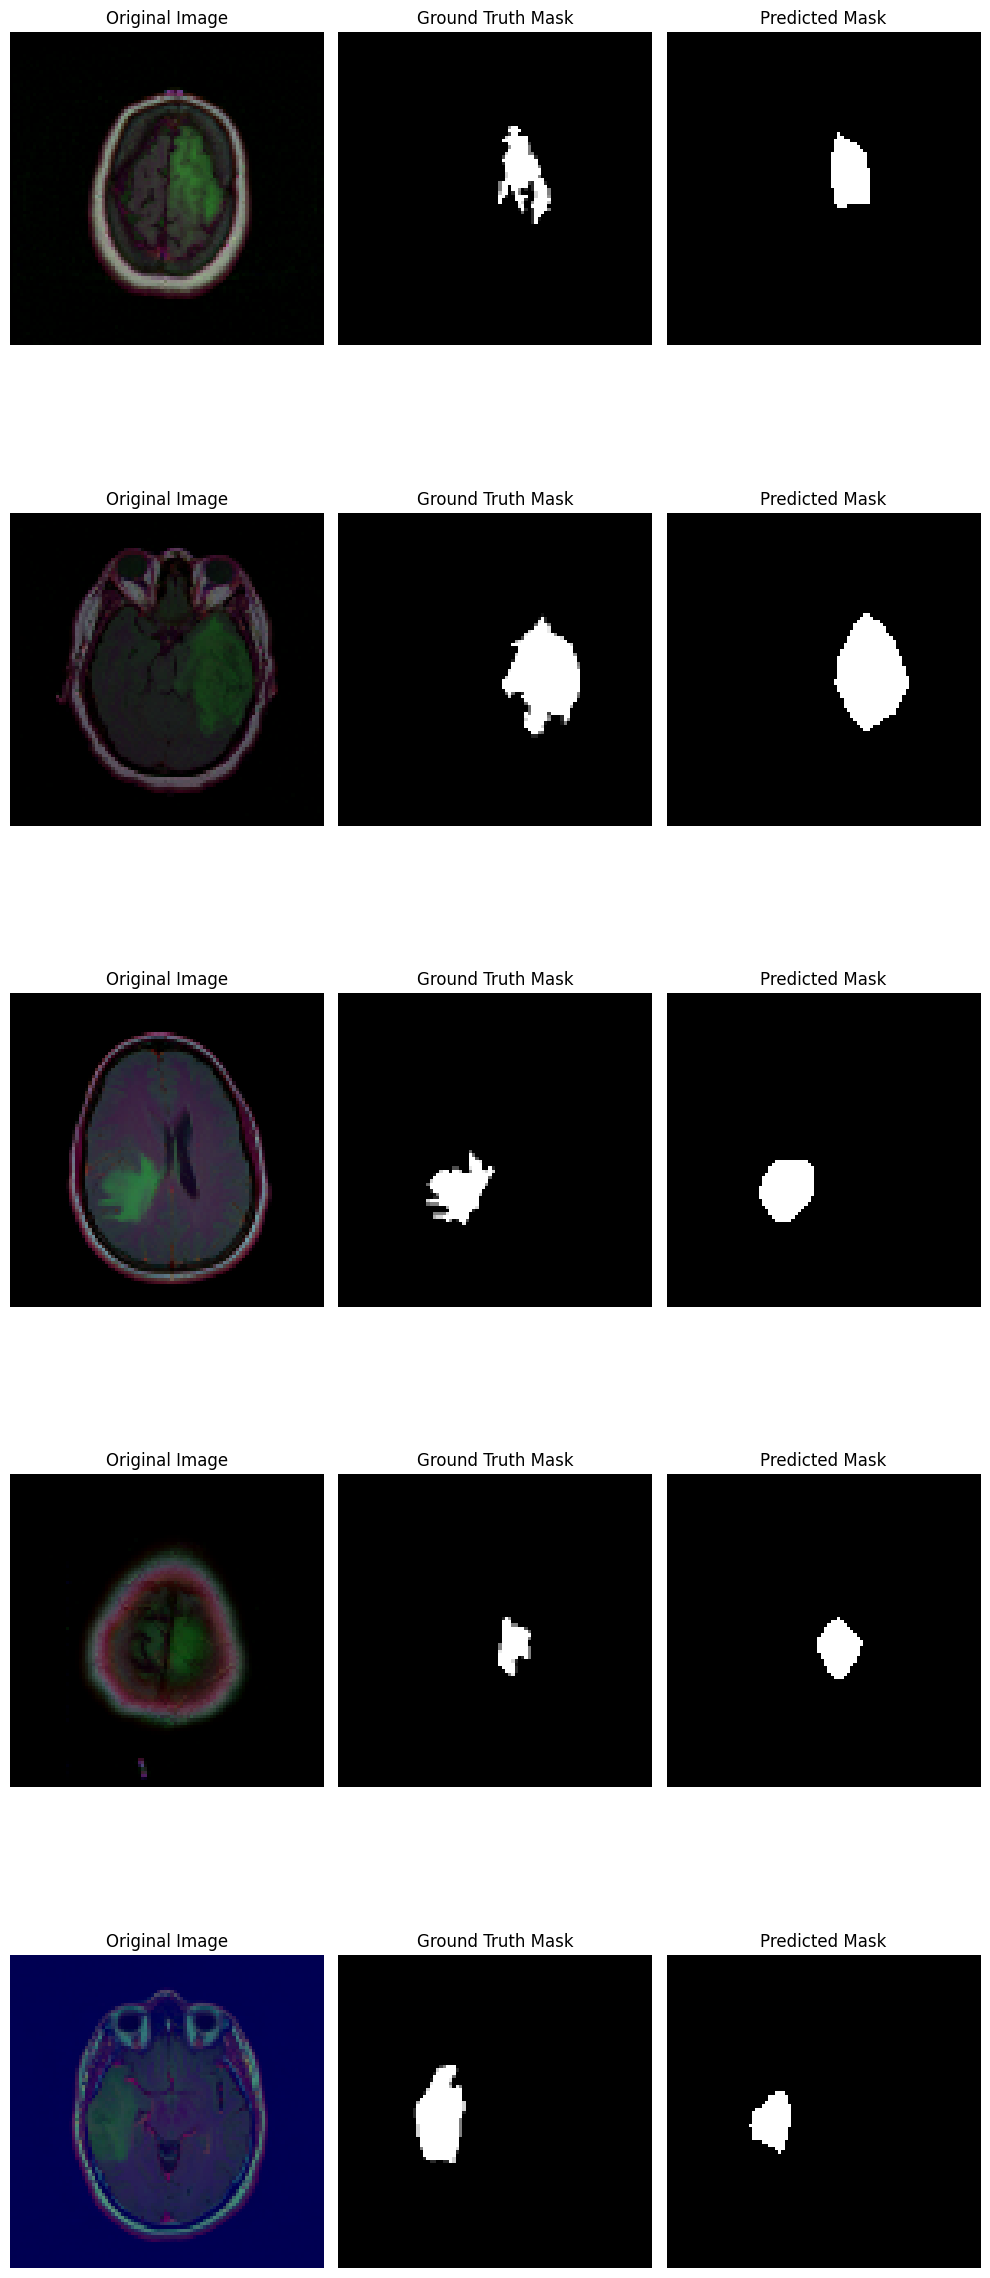

In [31]:
import matplotlib.pyplot as plt
import torch

# Function to visualize segmentation results
def visualize_segmentation_results(model, dataloader, num_samples=5):
    model.eval()
    device = next(model.parameters()).device
    samples = 0
    plt.figure(figsize=(10, num_samples * 5))

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            preds = outputs > 0.5
            preds = preds.float()

            for i in range(inputs.size(0)):
                if samples >= num_samples:
                    break

                # Plot original image
                plt.subplot(num_samples, 3, samples * 3 + 1)
                plt.imshow(inputs[i].cpu().permute(1, 2, 0))
                plt.title("Original Image")
                plt.axis('off')

                # Plot ground truth mask
                plt.subplot(num_samples, 3, samples * 3 + 2)
                plt.imshow(labels[i].cpu().squeeze(), cmap='gray')
                plt.title("Ground Truth Mask")
                plt.axis('off')

                # Plot predicted mask
                plt.subplot(num_samples, 3, samples * 3 + 3)
                plt.imshow(preds[i].cpu().squeeze(), cmap='gray')
                plt.title("Predicted Mask")
                plt.axis('off')

                samples += 1

            if samples >= num_samples:
                break

    plt.tight_layout()
    plt.show()

visualize_segmentation_results(final_model, testingloader, num_samples=5)


Comparison metrics

In [38]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score
import numpy as np

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

# Evaluate the final model and compute metrics
def evaluate_model(model, loader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.sigmoid(outputs) > 0.5  # Binarize the predictions
            preds = preds.float()
            labels = labels.float()

            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_preds = np.concatenate(all_preds).reshape(-1)
    all_labels = np.concatenate(all_labels).reshape(-1)

    # Ensure binary values
    all_preds = (all_preds > 0.5).astype(np.uint8)
    all_labels = (all_labels > 0.5).astype(np.uint8)

    accuracy = (all_preds == all_labels).sum() / len(all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    iou = jaccard_score(all_labels, all_preds)
    dice = dice_coefficient(torch.tensor(all_labels), torch.tensor(all_preds))

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'IoU: {iou:.4f}')
    print(f'Dice Coefficient: {dice:.4f}')

    return accuracy, precision, recall, f1, iou, dice

# Assuming final_model, trainloader, validationloader, and testingloader are already defined
train_metrics = evaluate_model(final_model, trainloader)
val_metrics = evaluate_model(final_model, validationloader)
test_metrics = evaluate_model(final_model, testingloader)

print(f'Training Metrics: {train_metrics}')
print(f'Validation Metrics: {val_metrics}')
print(f'Test Metrics: {test_metrics}')


Accuracy: 0.8443
Precision: 0.1068
Recall: 0.9997
F1 Score: 0.1929
IoU: 0.1067
Dice Coefficient: 0.1929
Accuracy: 0.8402
Precision: 0.0955
Recall: 0.9809
F1 Score: 0.1740
IoU: 0.0953
Dice Coefficient: 0.1740
Accuracy: 0.8694
Precision: 0.1057
Recall: 0.9654
F1 Score: 0.1906
IoU: 0.1053
Dice Coefficient: 0.1906
Training Metrics: (0.8443329018890542, 0.10675175492998812, 0.9996876283471491, 0.19290421205320643, 0.10674819416871227, tensor(0.1929))
Validation Metrics: (0.8401736304873512, 0.09547277622108676, 0.980892438824758, 0.17400882711521565, 0.09529554671412159, tensor(0.1740))
Test Metrics: (0.8694470117962549, 0.10571774169362981, 0.9654165081780145, 0.1905674345686539, 0.10531889290012034, tensor(0.1906))


In [34]:
!pip install onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 34.1 MB/s eta 0:00:00


In [37]:
import torch
import torch.onnx
import torch.nn.functional as F
import torch.nn as nn

# Define the enhanced BrainTumorNet model
class BrainTumorNet(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(BrainTumorNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(512, 1, kernel_size=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.upsample = nn.Upsample(scale_factor=8, mode='bilinear', align_corners=True)
        self.dropout = nn.Dropout(p=dropout_rate)

        self.attention = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = self.dropout(x)

        attn = self.attention(x)
        x = x * attn

        x = self.conv5(x)
        x = self.upsample(x)
        x = torch.sigmoid(x)
        return x
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model and move it to the appropriate device
model = BrainTumorNet().to(device)

# Define dummy input
dummy_input = torch.randn(1, 3, 256, 256).to(device)

# Export the model to an ONNX file
torch.onnx.export(model, dummy_input, "BrainTumorNet.onnx")

print("Model has been successfully exported to BrainTumorNet.onnx")


Model has been successfully exported to BrainTumorNet.onnx


In [38]:
from google.colab import files

# Download the ONNX file
files.download('BrainTumorNet.onnx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>